# Scikit-learn_Template

# Step 0: Standard Library Import

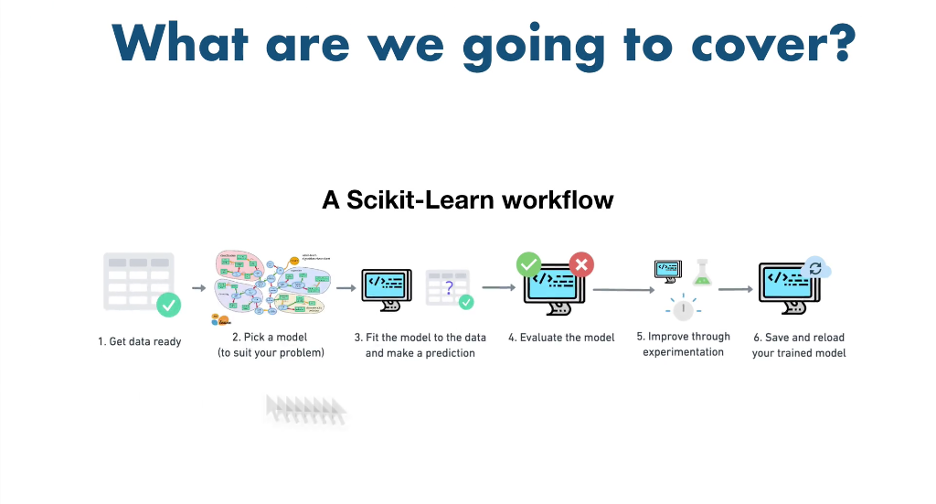

In [1]:
from IPython.display import Image
Image(filename="SKlearning.png")

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

# Step 1: Get the Data Ready

"More data doesn't mean it's good. We only want useful data." Clean -> Transform ->Reduce

Three things to do: 

(1) Split the data into feature and labels (usually 'X' and 'Y'), train and test sets;

(2) Filling (also called imputing) or disregarding missing value

(3) Converting non-numerial values to numerical values, aka feature coding

In [3]:
# Classification data
heart_disease = pd.read_csv("../skl/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
## Create X (features matrix) and Y the labels
x =heart_disease.drop("target", axis=1) #remove the target column, axis=1 means column axis, not row axis=0
y =heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [5]:
## IMPORTANT: Split the data x into random training data and test data, split the data y into training data and test data; 
#80% use for training, 20% for testing; don't use all data for training
from sklearn.model_selection import train_test_split

#return 4 different values
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.2) #20% data used for testing

x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
141,43,1,0,115,303,0,1,181,0,1.2,1,0,2
100,42,1,3,148,244,0,0,178,0,0.8,2,2,2
138,57,1,0,110,201,0,1,126,1,1.5,1,0,1
76,51,1,2,125,245,1,0,166,0,2.4,1,0,2
272,67,1,0,120,237,0,1,71,0,1.0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2
95,53,1,0,142,226,0,0,111,1,0.0,2,0,3
237,60,1,0,140,293,0,0,170,0,1.2,1,2,3
242,64,1,0,145,212,0,0,132,0,2.0,1,2,1


In [6]:
# can verify the 80% and 20% with below
heart_disease.shape,x_train.shape,x_test.shape,y_train.shape,y_test.shape

((303, 14), (242, 13), (61, 13), (242,), (61,))

# 1.1 Make sure it's all numerical - encoder string features to vectors

In [7]:
car_sales=pd.read_csv("car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [8]:
len(car_sales)

1000

In [9]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

### Sk learn cannot deal with strings!!!

In [9]:
#Only give the make, color, Odometer, doors, can the model predict the price of $XXX? 
##Step 1: Split X Y into 80% 20%
x =car_sales.drop("Price",axis=1)
y= car_sales["Price"]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

# step2:Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestRegressor  # Classification ML model is RandomForestClassifier
model=RandomForestRegressor() #n-estimator

# Step 3: Find the patterns in the traning data
model.fit(x_train,y_train)
model.score(x_test,y_test)
## sk learn cannot deal with strings!!!

ValueError: could not convert string to float: 'Honda'

In [10]:
## Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Create three categorical groups
categories_features = ["Make","Colour","Doors"]

one_hot=OneHotEncoder() # this is an encoder -- change strings combination into array code
#tranform the categories_features columns into the encoders, then for the columns not in the categories_features,
# leave it the same -- called "passthrough"
transformer=ColumnTransformer([("one_hot",one_hot,categories_features)],remainder="passthrough") 

transformed_x=transformer.fit_transform(x)
pd.DataFrame(transformed_x) # what is this? because we told SKL to make color and door as categories

ValueError: A given column is not a column of the dataframe

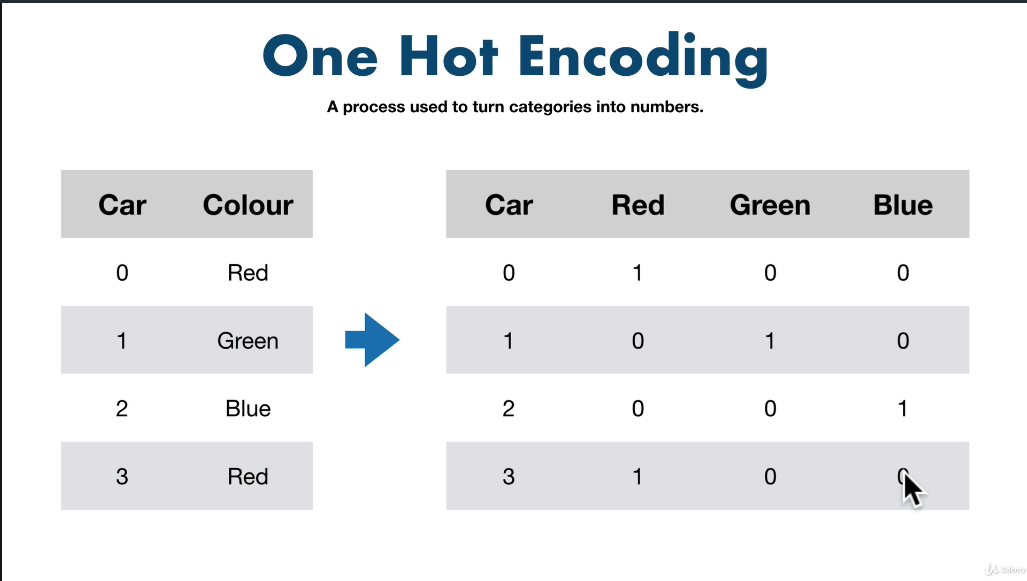

In [11]:
#What does the encoder do? 
Image(filename="onehot.png")

In [12]:
# similar function in pandas called dummies
dummies=pd.get_dummies(car_sales[["Make","Colour","Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [13]:
#Continue split data
x_train, x_test, y_train, y_test = train_test_split(transformed_x,y,test_size=0.2)

# step2:Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestRegressor  # Classification ML model is RandomForestClassifier
model=RandomForestRegressor() #n-estimator

# Step 3: Find the patterns in the traning data
model.fit(x_train,y_train)

# metric, low fitting
model.score(x_test,y_test)

0.2485327872550891

# 1.2 What if data has missing values? Method 1: Pandas

In [13]:
#Import Car sales missing data
car_sales_missing=pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [14]:
car_sales_missing.isna().sum() #showing how many missing values

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

### SKL cannot work with data containing NaN !!!

In [16]:
#Convert String with Encoder (Same as above)
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

x =car_sales_missing.drop("Price",axis=1)
y= car_sales_missing["Price"]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

# Create three categorical groups
categories_features = ["Make","Colour","Doors"]

one_hot=OneHotEncoder() # this is an encoder -- change strings combination into array code
#tranform the categories_features columns into the encoders, then for the columns not in the categories_features,
# leave it the same -- called "passthrough"
transformer=ColumnTransformer([("one_hot",one_hot,categories_features)],remainder="passthrough") 

transformed_x=transformer.fit_transform(x)
pd.DataFrame(transformed_x)



ValueError: Input contains NaN

In [15]:
##### This order is differnt below. If using scikit, should split the train and test first, then deal 
# with N/A and encoder seperately, see 1.3
#1. Handle Missing Value: How to handle missing values? 

# Option 1: fill missing data with Pandas
car_sales_missing["Make"].fillna("missing",inplace=True)
car_sales_missing["Colour"].fillna("missing",inplace=True)
car_sales_missing["Doors"].fillna(4,inplace=True)
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(),inplace=True)
# Check the missing value again
car_sales_missing.isna().sum()

#Option 2: Remove rows with missing price value
car_sales_missing =car_sales_missing.dropna()

# Check the missing value again, now all columns should have zero
car_sales_missing.isna().sum()

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

#####
#2. seperate into two groups, cuz after the encoder, the column names will be 1,2,3...
x =car_sales_missing.drop("Price",axis=1)
y =car_sales_missing["Price"]


#####
#3. encoder to handle strings: note - only encoder and transform x, cuz y is doesn't have string groups.
# This has no impact on the data, only change the strings into matrix stype, no impact on length
# Create three categorical groups
categories_features = ["Make","Colour","Doors"]

one_hot=OneHotEncoder() # this is an encoder -- change strings combination into array code
#tranform the categories_features columns into the encoders, then for the columns not in the categories_features,
# leave it the same -- called "passthrough"
transformer=ColumnTransformer([("one_hot",one_hot,categories_features)],remainder="passthrough") 

transformed_x =transformer.fit_transform(x) # when I use x, cannot populate the right result
#pd.DataFrame(transformed_x) # what is this? because we told SKL to make color and door as categories
pd.DataFrame(transformed_x)

#####
#4. Split the data 
## Deal with missing data first, then splipt
x_train, x_test, y_train, y_test = train_test_split(transformed_x,y,test_size=0.2)

# step2:Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestRegressor  # Classification ML model is RandomForestClassifier
model=RandomForestRegressor() #n-estimator

# Step 3: Find the patterns in the traning data
model.fit(x_train,y_train)

# metric, low fitting
model.score(x_test,y_test)

0.13164603892474935

# 1.3 What if data has missing values? Method 2: Scikit-learn

Split your data first (into train/test), always keep your training & test data separate

Fill/transform the training set and test sets separately (this goes for filling data with pandas as well)

Don't use data from the future (test set) to fill data from the past (training set)

In [16]:
car_missing_data = pd.read_csv("car-sales-extended-missing-data.csv")
car_missing_data.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [17]:
car_missing_data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [18]:
###1. Drop the missing y values using pandas, you can do fills with SKL below
car_missing_data.dropna(subset=["Price"],inplace=True) #dropthe nan in price columns
car_missing_data.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [19]:
#####2. Split into x and y
from sklearn.model_selection import train_test_split
x = car_missing_data.drop("Price", axis=1)
y = car_missing_data["Price"]

#####3. Split data into train and test 0.2
np.random.seed(42) #?
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2)
x.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
dtype: int64

In [20]:
##### 4.Fill missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Define the filling methods - Fill categorical values with 'missing' & numerical values with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define columns as features
cat_features = ["Make", "Colour"]
door_feature = ["Doors"]
num_features = ["Odometer (KM)"]

# Map: create an imputer (something that fills missing data) -- map the filling methods to the features
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_feature),
    ("num_imputer", num_imputer, num_features)
])

# Fill train and test values separately
filled_x_train = imputer.fit_transform(x_train) # fit_transform imputes the missing values from the training set and fills them simultaneously
filled_x_test = imputer.transform(x_test) # tranform takes the imputing missing values from the training set and fills the test set with them

# Check filled X_train
filled_x_train

# Get our transformed data array's back into DataFrame's
car_sales_filled_train = pd.DataFrame(filled_x_train, 
                                      columns=["Make", "Colour", "Doors", "Odometer (KM)"])

car_sales_filled_test = pd.DataFrame(filled_x_test, 
                                     columns=["Make", "Colour", "Doors", "Odometer (KM)"])

# Check missing data in training set
car_sales_filled_train.isna().sum()

# Check missing data in test set
car_sales_filled_test.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [21]:
# Check to see the original... still missing values
car_missing_data.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [22]:
#### 5. encoder strings - Again, keeping our training and test data separate.
# Import OneHotEncoder class from sklearn
from sklearn.preprocessing import OneHotEncoder

# Now let's one hot encode the features with the same code as before (Same as above) 
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                 one_hot, 
                                 categorical_features)],
                                 remainder="passthrough")

# Fill train and test values separately
transformed_x_train = transformer.fit_transform(car_sales_filled_train) # fit and transform the training data
transformed_x_test = transformer.transform(car_sales_filled_test) # transform the test data

# Check transformed and filled X_train
transformed_x_train.toarray()

# step2: Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestRegressor  # Classification ML model is RandomForestClassifier
model=RandomForestRegressor() #n-estimator

# Step 3: Find the patterns in the traning data
model.fit(transformed_x_train,y_train)

# metric, low fitting
model.score(transformed_x_test,y_test)


0.21735623151692096

In [23]:
len(car_sales_filled_train), len(car_sales_filled_test)

(760, 190)

#### Extension: Feature Scaling 

Once your data is all in numerical format, there's one more transformation you'll probably want to do to it. It's called Feature Scaling. In other words, making sure all of your numerical data is on the same scale.

For example, say you were trying to predict the sale price of cars and the number of kilometres on their odometers varies from 6,000 to 345,000 but the median previous repair cost varies from 100 to 1,700. A machine learning algorithm may have trouble finding patterns in these wide-ranging variables.

To fix this, there are two main types of feature scaling.

Normalization (also called min-max scaling) - This rescales all the numerical values to between 0 and 1, with the lowest value being close to 0 and the highest previous value being close to 1. Scikit-Learn provides functionality for this in the MinMaxScalar class.

Standardization - This subtracts the mean value from all of the features (so the resulting features have 0 mean). It then scales the features to unit variance (by dividing the feature by the standard deviation). Scikit-Learn provides functionality for this in the StandardScalar class.

A couple of things to note.

Feature scaling usually isn't required for your target variable. Feature scaling is usually not required with tree-based models (e.g. Random Forest) since they can handle varying features.

# Step 2: Choose the Right Estimator (Algorithm Model)

To pick a model we use the Scikit-Learn machine learning map.

Note: Scikit-Learn refers to machine learning models and algorithms as estimators.

Classification - predicting whether a sample is one thing or another
Regression - predicting a number

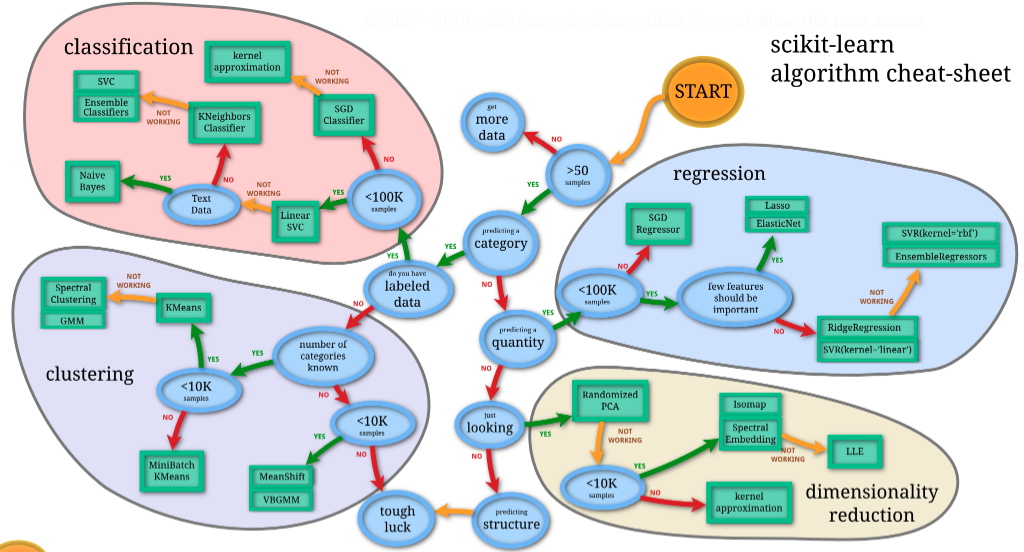

In [24]:
#https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html
Image(filename="Pick_model.png")

## 2.1 Picking a machine learning model for a regression problem¶


In [27]:
# Import Boston housing dataset for practice
from sklearn.datasets import load_boston
boston = load_boston()
boston_df = pd.DataFrame(boston["data"], columns=boston["feature_names"])
boston_df["target"] = pd.Series(boston["target"])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Ridge Regression Model

https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression

In [28]:
# Let's try the Ridge Regression model
from sklearn.linear_model import Ridge

# Setup random seed
np.random.seed(42)

# Create the data
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate Ridge model
model = Ridge()
model.fit(X_train, y_train)

# Check the score of the Ridge model on test data
model.score(X_test, y_test)

0.6662221670168522

How do we improve this score?

What if Ridge wasn't working? Use the enssamble method (the RandomForestRegressor)

Let's refer back to the map... https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

### RandomForestRegressor

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor

In [29]:
# Let's try the Random Forst Regressor
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

# Split the data
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instatiate Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

# Evaluate the Random Forest Regressor
rf.score(X_test, y_test)

0.8922527442109116

## 2.2 Choosing an estimator for a classification problem

heart disease or no heart disease? Result is True or False

Let's go to the map... https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

Try LinearSVC first based on the map

In [30]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [31]:
# Do we have 50+, 100+ samples?
len(heart_disease)

303

In [32]:
# Import the LinearSVC estimator class
from sklearn.svm import LinearSVC

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate LinearSVC
clf = LinearSVC(max_iter=20000) # there can be warnings if the max_iter is too small, 
                                # so cannot predict well
clf.fit(X_train, y_train)

# Evaluate the LinearSVC
clf.score(X_test, y_test)

/Users/yubeiliu/Desktop/sample_project/skl/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.8688524590163934

In [33]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

Follow the map, see whether the RandomForestClassifier can perform better

In [34]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

# Evaluate the Random Forest Classifier
clf.score(X_test, y_test)

0.8524590163934426

Tip: 

1. If you have structured data, used ensemble methods
2. If you have unstructured data, use deep learning or transfer learning

Random Forest model deep dive
These resources will help you understand what's happening inside the Random Forest models we've been using.

Random Forest Wikipedia

Random Forest Wikipedia (simple version)

Random Forests in Python by yhat

An Implementation and Explanation of the Random Forest in Python by Will Koehrsen

# Step 3: Make a prediction

## 3.1 Fitting the model to the data
Different names for:

X = features, features variables, data 

y = labels, targets, target variables

In [35]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100)

# Fit the model to the data (training the machine learning model)
clf.fit(X_train, y_train)  #fit function


# Evaluate the Random Forest Classifier (use the patterns the model has learned)
clf.score(X_test, y_test)

0.8524590163934426

In [36]:
# when passing all x_train, fit will find the pattern in y label
x.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431.0,4.0
1,BMW,Blue,192714.0,5.0
2,Honda,White,84714.0,4.0
3,Toyota,White,154365.0,4.0
4,Nissan,Blue,181577.0,3.0


In [37]:
y.tail()

298    0
299    0
300    0
301    0
302    0
Name: target, dtype: int64

In [38]:
# Step 3: Find the patterns in the traning data
model.fit(x_train,y_train)

# metric, low fitting
model.score(x_test,y_test)

ValueError: could not convert string to float: 'Honda'

## 3.2 Make predictions using a machine learning model - predict()

2 ways to make predictions:

1. predict()

2. predict_proba()

In [39]:
# Step 3: Make a prediction, cannot use different size from the training
y_preds=clf.predict(np.array([0,1,2,3])) ## So this doesn't work

ValueError: Expected 2D array, got 1D array instead:
array=[0. 1. 2. 3.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [40]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [41]:
y_preds=clf.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [42]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [43]:
# This is how the .score was calculated
#Compare prediction to truth labels to evaluate the model
y_preds=clf.predict(X_test)
np.mean(y_preds==y_test)

0.8524590163934426

In [44]:
clf.score(X_test,y_test)

0.8524590163934426

Example - predict used on Regression type of model

In [45]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [46]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit model
model = RandomForestRegressor(n_estimators=100).fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)

In [47]:
y_preds[:10]

array([23.081, 30.574, 16.759, 23.46 , 16.893, 21.644, 19.113, 15.334,
       21.14 , 20.639])

In [48]:
np.array(y_test[:10])

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8])

In [49]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

2.136382352941176

## 3.3 Make predictions using a machine learning model-predict_proba()

 use this if someone asks you "what's the probability your model is assigning to each prediction?"

In [50]:
# predict_proba() returns probabilities of a classification label 
clf.predict_proba(X_test[:5]) 
# this means , "0" prob = 0.89, "1" prob = 0.11, so the first returned value in next cell is 0.

array([[0.47, 0.53],
       [0.52, 0.48],
       [0.47, 0.53],
       [0.47, 0.53],
       [0.47, 0.53]])

In [51]:
# Let's predict() on the same data...
clf.predict(X_test[:5])

array([1, 0, 1, 1, 1])

In [52]:
X_test[:5]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
173,0.09178,0.0,4.05,0.0,0.510,6.416,84.1,2.6463,5.0,296.0,16.6,395.50,9.04
274,0.05644,40.0,6.41,1.0,0.447,6.758,32.9,4.0776,4.0,254.0,17.6,396.90,3.53
491,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4.0,711.0,20.1,390.11,18.07
72,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4.0,305.0,19.2,390.91,5.52
452,5.09017,0.0,18.10,0.0,0.713,6.297,91.8,2.3682,24.0,666.0,20.2,385.09,17.27


In [53]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [54]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [55]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit model
model = RandomForestRegressor(n_estimators=100).fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)

In [56]:
y_preds[:10]

array([23.081, 30.574, 16.759, 23.46 , 16.893, 21.644, 19.113, 15.334,
       21.14 , 20.639])

In [57]:
np.array(y_test[:10])

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8])

In [58]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

2.136382352941176

# Step 4: Evaluate the Model

There are 3 different APIs for evaluating the quality of a model’s predictions:

1. Estimator score method: Estimators have a score method providing a default evaluation criterion for the problem they are designed to solve. This is not discussed on this page, but in each estimator’s documentation.

2. Scoring parameter: Model-evaluation tools using cross-validation (such as model_selection.cross_val_score and model_selection.GridSearchCV) rely on an internal scoring strategy. This is discussed in the section The scoring parameter: defining model evaluation rules.

3. Metric functions: The metrics module implements functions assessing prediction error for specific purposes. These metrics are detailed in sections on Classification metrics, Multilabel ranking metrics, Regression metrics and Clustering metrics.

Finally, Dummy estimators are useful to get a baseline value of those metrics for random predictions.

## 4.1 Evaluating a model with the score method

In [65]:
# Step 4: evaluatate the model on the training data and test data 
# mean accuracy on the given test data and labels
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()

clf.fit(X_train, y_train)

RandomForestClassifier()

In [66]:
clf.score(X_train, y_train)

1.0

In [67]:
#.score Return the mean accuracy on the given test data and labels.
clf.score(X_test, y_test)

0.8524590163934426

Let's do the same but for regression...

In [68]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit model
model = RandomForestRegressor(n_estimators=100).fit(X_train, y_train)

In [69]:
# .score() Return the coefficient of determination R^2 of the prediction.
model.score(X_test, y_test)

0.8654448653350507

## 4.2 Evaluating a model using the scoring parameter

In [70]:
from sklearn.model_selection import cross_val_score  ## imported cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_estimators=100)

clf.fit(X_train, y_train);

In [71]:
clf.score(X_test, y_test)

0.8524590163934426

In [72]:

cross_val_score(clf, X, y, cv=5)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [73]:

cross_val_score(clf, X, y, cv=10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.73333333, 0.86666667, 0.73333333, 0.8       ])

In [74]:

np.random.seed(42)

# Single training and test split score
clf_single_score = clf.score(X_test, y_test)

# Take the mean of 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf, X, y, cv=5))

# Compare the two
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [82]:
# Default scoring parameter of classifier = mean accuracy
clf.score()

0.9702970297029703

In [76]:
# Scoring parameter set to None by default
# 这里用 X, y, 而不是test和train
# cv=5是现实an array of 5 difference scores, 看下面图，把data分成5分来test
# scoring设置成none by default，这个可以自己设置score paremeter
cross_val_score(clf, X, y, cv=5, scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

In [81]:
cross_val_score(clf, X, y, cv=10, scoring=None)

array([0.87096774, 0.80645161, 0.83870968, 0.9       , 0.9       ,
       0.8       , 0.76666667, 0.9       , 0.73333333, 0.76666667])

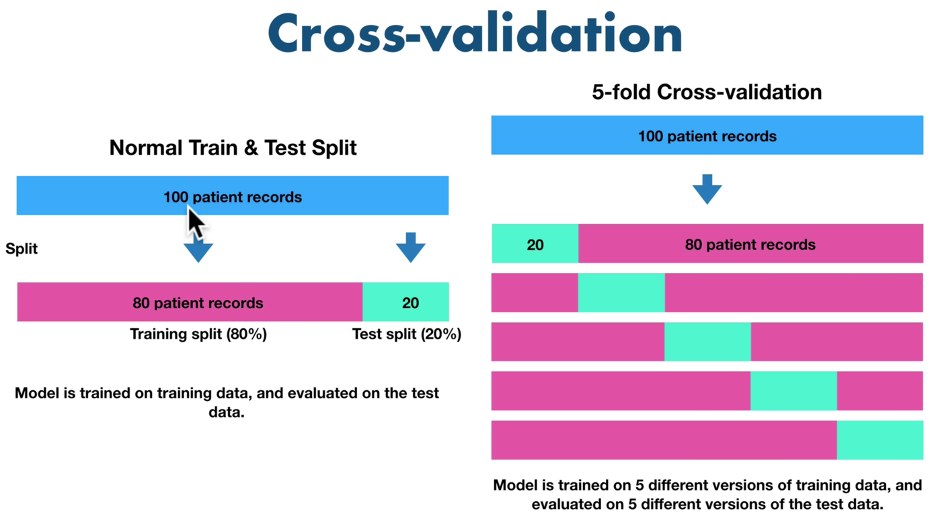

In [80]:
from IPython.display import Image
Image(filename="cross_vali.png")

### 4.2.1 Classification model evaluation metrics
1.Accuracy

2.Area under ROC curve

3.Confusion matrix

4.Classification report

### 1.Accuracy - how likely can the model predict the right label?

In [83]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [87]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators=100)
cross_val_score = cross_val_score(clf, X, y, cv=5)

In [85]:
np.mean(cross_val_score)

0.8248087431693989

In [86]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score) *100:.2f}%")

Heart Disease Classifier Cross-Validated Accuracy: 82.48%


### Area under the receiver operating characteristic curve (AUC/ROC)

*Area under curve (AUC)

*ROC curve

ROC curves are a comparison of a model's true postive rate (tpr) versus a models false positive rate (fpr).

True positive = model predicts 1 when truth is 1

False positive = model predicts 1 when truth is 0

True negative = model predicts 0 when truth is 0

False negative = model predicts 0 when truth is 1


ROC curves and AUC metrics are evaluation metrics for binary classification models (a model which predicts one thing or another, such as heart disease or not).

The ROC curve compares the true positive rate (tpr) versus the false positive rate (fpr) at different classification thresholds.

The AUC metric tells you how well your model is at choosing between classes (for example, how well it is at deciding whether someone has heart disease or not). A perfect model will get an AUC score of 1.

In [88]:
# Create X_test... etc
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [89]:
from sklearn.metrics import roc_curve  ## import roc_curve

# Fit the classifier
clf.fit(X_train, y_train)

# Make predictions with probabilities, probabilities of zero or one,
y_probs = clf.predict_proba(X_test)

y_probs[:10], len(y_probs)

(array([[0.51, 0.49],
        [0.17, 0.83],
        [0.51, 0.49],
        [0.72, 0.28],
        [0.43, 0.57],
        [0.12, 0.88],
        [0.3 , 0.7 ],
        [0.97, 0.03],
        [0.15, 0.85],
        [0.4 , 0.6 ]]),
 61)

In [90]:
# we only extract the probabiliries for positive result (y=1), in this case, we want the column #1 result

y_probs_positive = y_probs[:, 1] 
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [92]:
# Caculate fpr, tpr and thresholds: roc_curve is restricted to the binary classification task.
# fpr: array, shape = [>2]   Increasing false positive rates such that element i is the false
# positive rate of predictions with score >= thresholds[i].
#
#tpr : array, shape = [>2] Increasing true positive rates such that element i is the true positive 
# rate of predictions with score >= thresholds[i].
#
#thresholds : array, shape = [n_thresholds] Decreasing thresholds on the decision function used to compute 
# fpr and tpr. `thresholds[0]` represents no instances being predicted
# and is arbitrarily set to `max(y_score) + 1`.

fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check the false positive rates
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

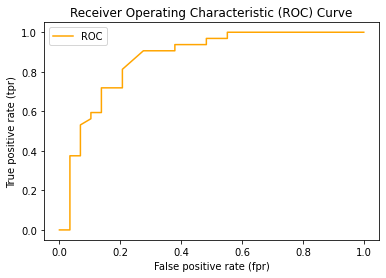

In [93]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model.
    """
    # Plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    # Plot line with no predictive power (baseline)
    #plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--", label="Guessing")
    
    # Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr) # compare the false positive to the true positive 

In [94]:
from sklearn.metrics import roc_auc_score ## what's this metric? 
#
roc_auc_score(y_test, y_probs_positive)

0.8669181034482759

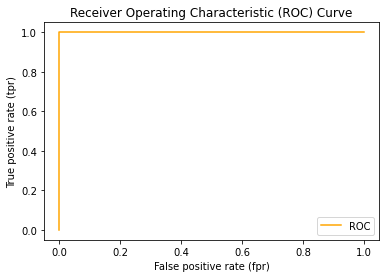

In [95]:
# Plot perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [96]:
# Perfect AUC score
roc_auc_score(y_test, y_test)

1.0

### Confusion Matrix

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.

In essence, giving you an idea of where the model is getting confused.

In [97]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]])

In [99]:
#这个现实predict的和actual label契合的表格
# Visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test,
            y_preds,
            rownames=["Actual Labels"],
            colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,23,6
1,6,26


In [100]:
22 + 7 + 8 + 24

61

In [101]:
len(X_test)

61

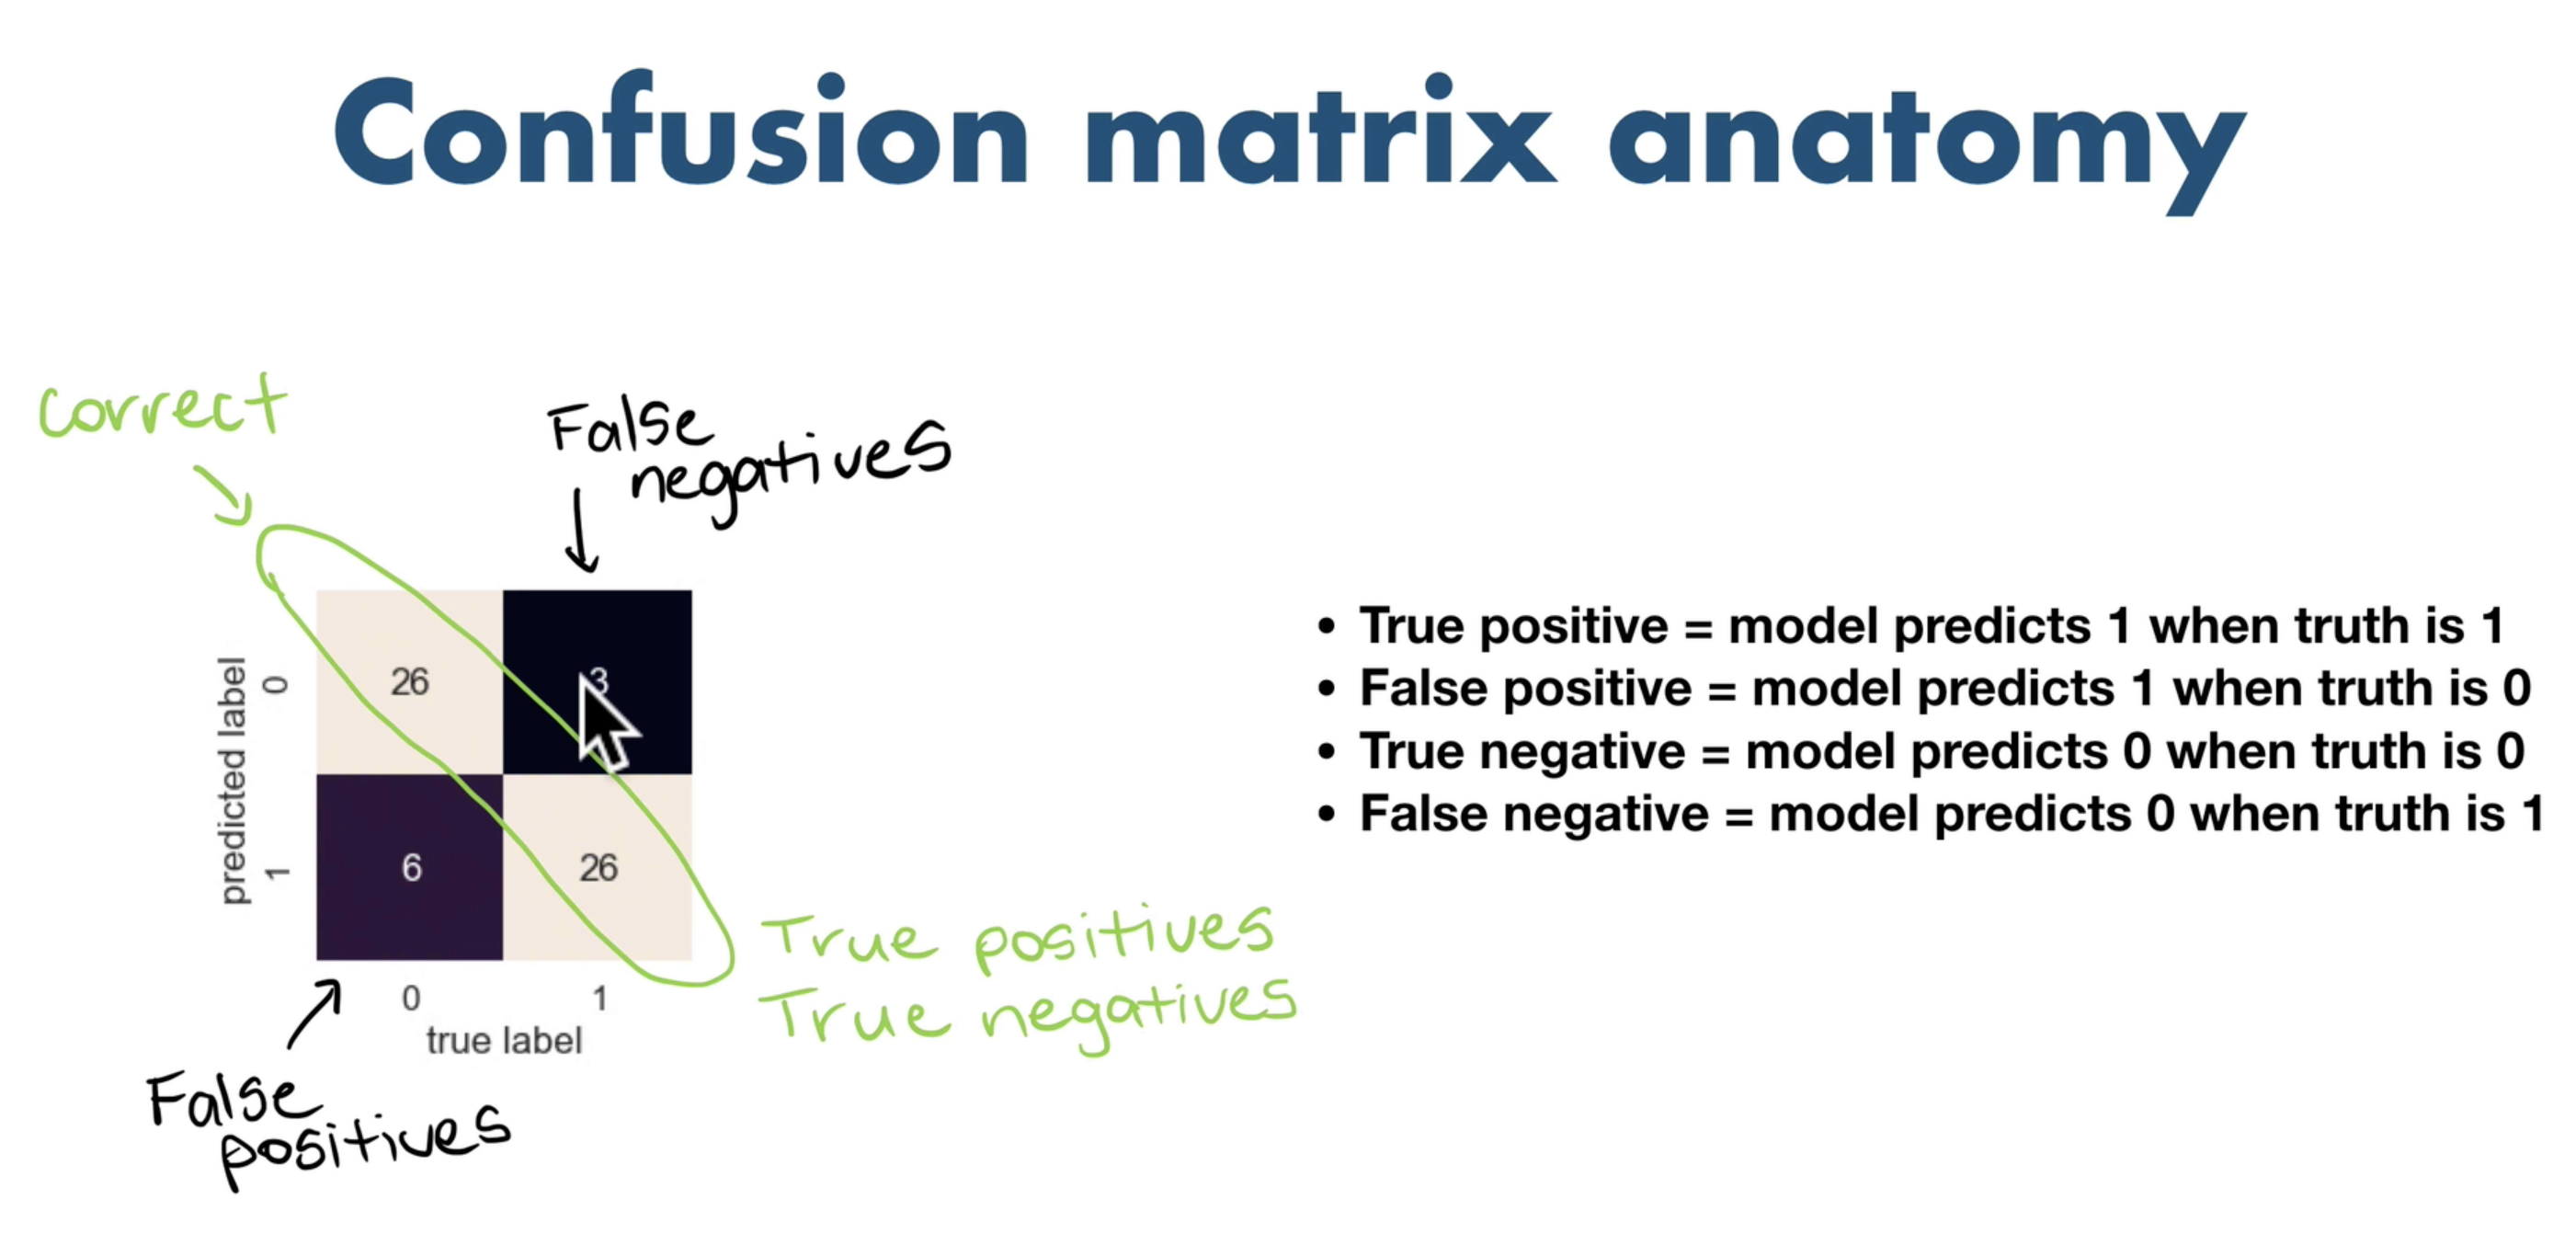

In [102]:
from IPython.display import Image
Image(filename="confusion.png")

In [ ]:
# # How install a conda package into the current envrionment from a Jupyter Notebook
# import sys
# !conda install --yes --prefix {sys.prefix} seaborn

In [107]:
import sys
!conda install --yes --prefix {sys.prefix} seaborn

Solving environment: done

## Package Plan ##

  environment location: /Users/yubeiliu/Desktop/sample_project/skl

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.6.24  |                0         125 KB
    seaborn-0.10.1             |             py_0         163 KB
    ------------------------------------------------------------
                                           Total:         288 KB

The following NEW packages will be INSTALLED:

  seaborn            pkgs/main/noarch::seaborn-0.10.1-py_0

The following packages will be UPDATED:

  ca-certificates                                2020.1.1-0 --> 2020.6.24-0



seaborn-0.10.1       | 163 KB    | ##################################### | 100% 
ca-certificates-2020 | 125 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction:

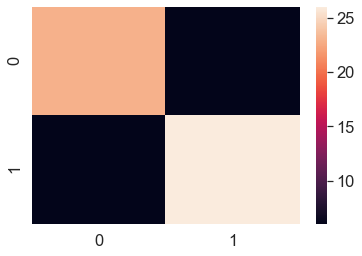

In [108]:
# Make our confusion matrix more visual with Seaborn's heatmap()
import seaborn as sns ## use seaborn-heatmap

# Set the font scale 
sns.set(font_scale=1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

# Plot it using Seaborn
sns.heatmap(conf_mat);

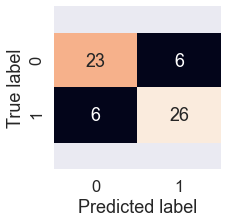

In [109]:
def plot_conf_mat(conf_mat):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(conf_mat,
                     annot=True, # Annotate the boxes with conf_mat info
                     cbar=False)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    
    # Fix the broken annotations (this happened in Matplotlib 3.1.1)
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top-0.5);
    
plot_conf_mat(conf_mat)

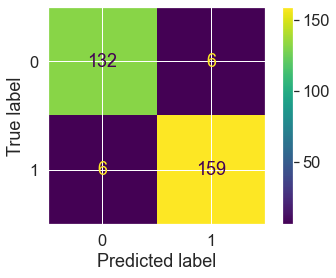

In [110]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X, y)

In [111]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [ ]:
# Where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 # only one positive case

disease_preds = np.zeros(10000) # model predicts every case as 0

pd.DataFrame(classification_report(disease_true,
                                   disease_preds,
                                   output_dict=True))

To summarize classification metrics:

Accuracy is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1).

Precision and recall become more important when classes are imbalanced.

If false positive predictions are worse than false negatives, aim for higher precision.

If false negative predictions are worse than false positives, aim for higher recall.

F1-score is a combination of precision and recall.

# Step 5: Improve a Model

In [ ]:
# try different amount of n_estimateros to make the model more precise
np.random.seed(42)
for i in range(10,100,10):
    print(f"Trying model with {i} estimators ...")
    clf = RandomForestClassifier(n_estimators=i).fit(x_train,y_train)
    print(f"model accuracy on test set: {clf.score(x_test,y_test)*100:.2f}%")
    print(" ")

#based on below, we can use 20 estimators

# Step 6: Save a Model and Load It

In [ ]:
# Save the model
import pickle

pickle.dump(clf,open("random_forst_model_1.pkl","wb")) #write binary

In [ ]:
# Open the model
loaded_model = pickle.load(open("random_forst_model_1.pkl","rb")) #read binary
loaded_model.score(x_test,y_test)

# Warnings and Errors

For example: if n_estimator is not specified, a default will be created

In [ ]:
import warnings
# this can ignore all warnings -- but what if the warnings are important? 
warnings.filterwarnings("ignore")
#reset to default, other warnings will come back
warnings.filterwarnings("default")

In [ ]:
import sklearn
sklearn.show_versions()

# how to upgrade the package inside the environment?
# Terminal --> conda activate ///skl --> conda list: showing all the packages we have 
# --> conda update scikit-learn (or oether package name): this can only update to the newest version competible with 
# the current python version
# --> conda search scikit-learn --info (or other pacakge name): to see what version is available and what dependencies
# the dependencies can be version of python, etc. If I uninstall all pythons and make install all new versions required
# in the dependencies, then I can update the lib.


SyntaxError: invalid syntax (<ipython-input-1-fe3f7017c96b>, line 1)